In [89]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [98]:
img_file = 'lena_gray_512.tif'
intensities = cv2.imread(img_file, cv2.IMREAD_GRAYSCALE)
height = np.shape(intensities)[0]
width = np.shape(intensities)[1]
imf = np.float32(intensities)

all_nq_ac = []
for i in range(0,int(height/8)):
    for j in range(0,int(width/8)):
        blk = imf[8*i:8*(i+1), 8*j:8*(j+1)]
        shifted_blk = blk - 128 #level_shift for dct
        dct = cv2.dct(shifted_blk)
        nq_coef = np.round(dct)
        nq_coef_ac = np.delete(nq_coef, [0,0])
        
        all_nq_ac = np.append(all_nq_ac, nq_coef_ac)

In [99]:
ac_values, ac_counts = np.unique(all_nq_ac, return_counts=True)
ac_values_dic = {}
ac_counts_dic = {}
ac_bits_all_sizes = []
for i in range(1,11):
    neg_part = range(-(2**i-1), -2**(i-1)+1)
    pos_part = range(2**(i-1), 2**i)
    values_in_size = np.append(neg_part,pos_part)
    ac_values_dic[i] = values_in_size
    
    counts_in_size = np.zeros(np.size(values_in_size))
    for j in range(np.size(values_in_size)):
        if values_in_size[j] in ac_values:
            position_in_counts = np.where(
                ac_values == values_in_size[j])
            counts_in_size[j] = ac_counts[position_in_counts]
            
    ac_counts_dic[i] = counts_in_size

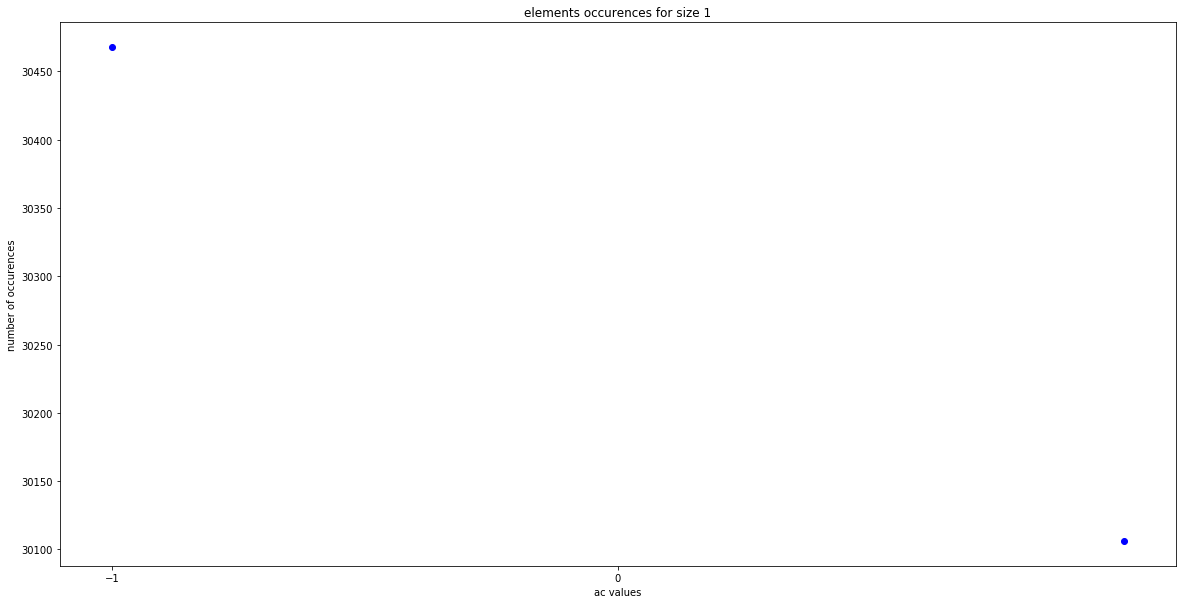

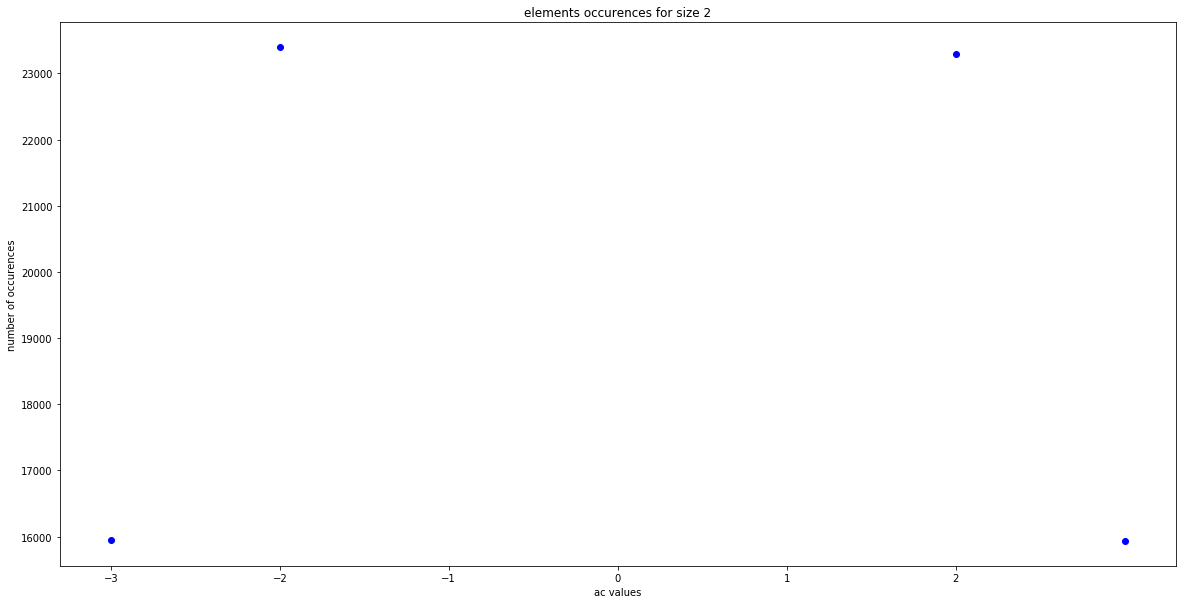

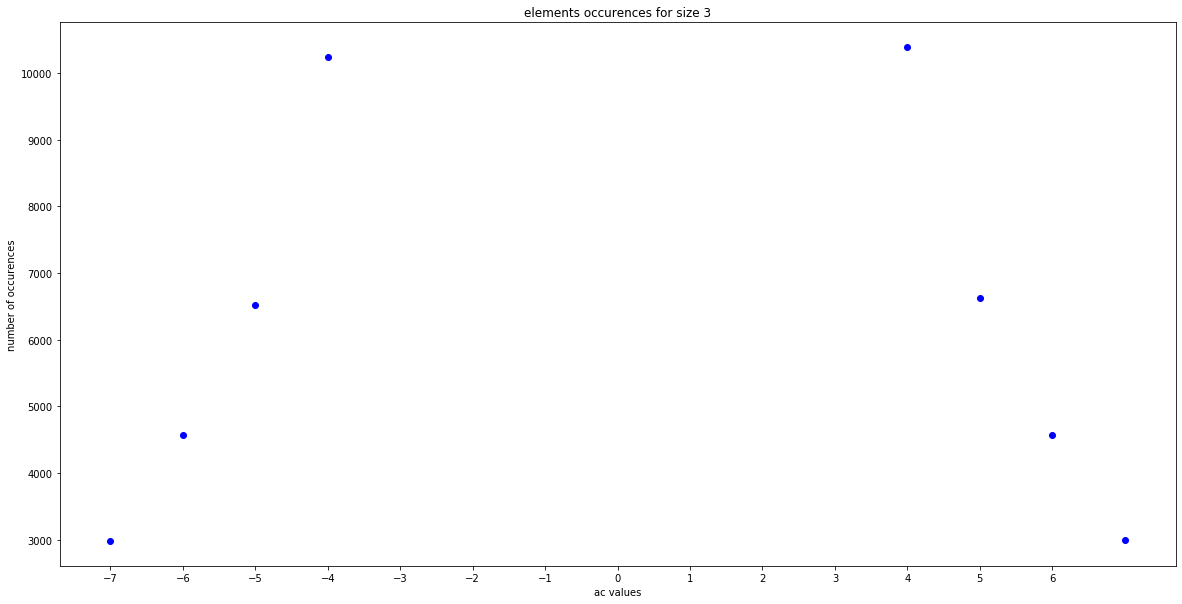

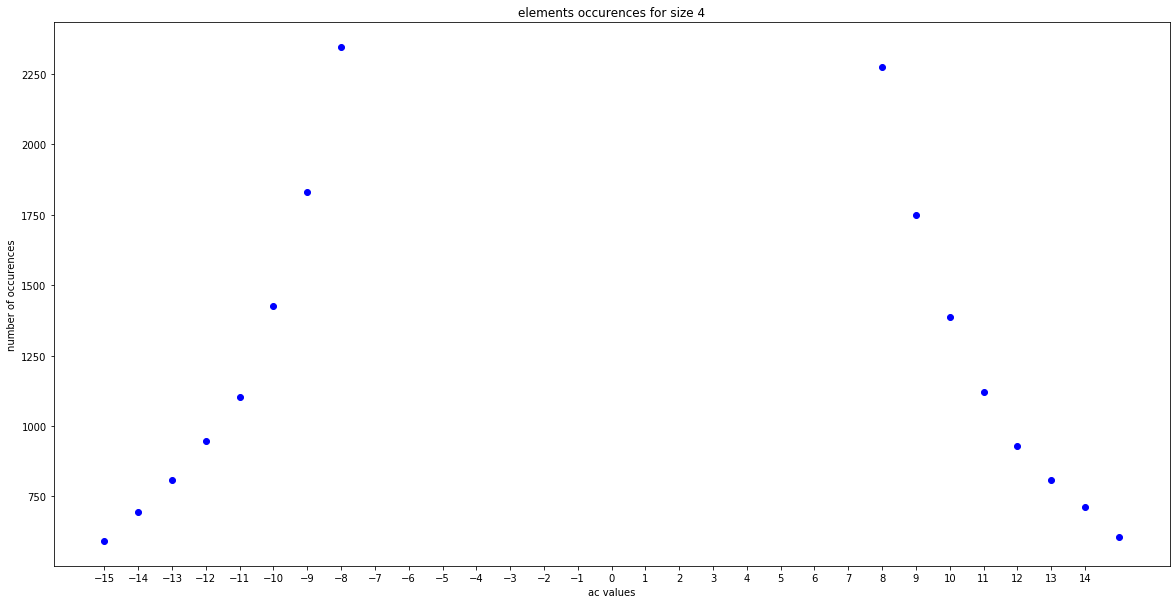

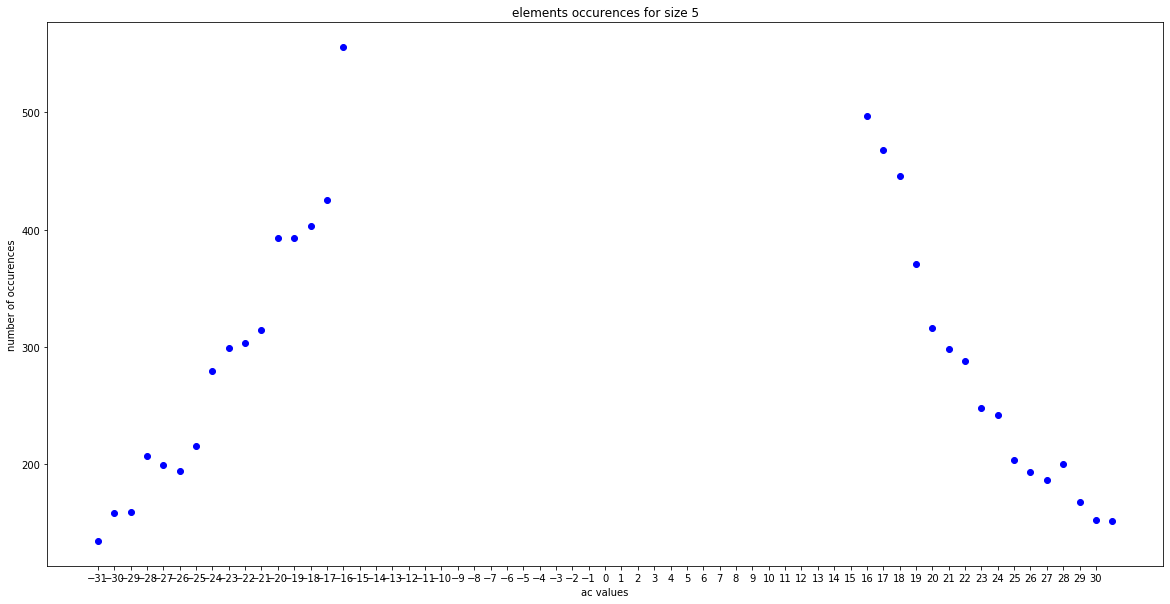

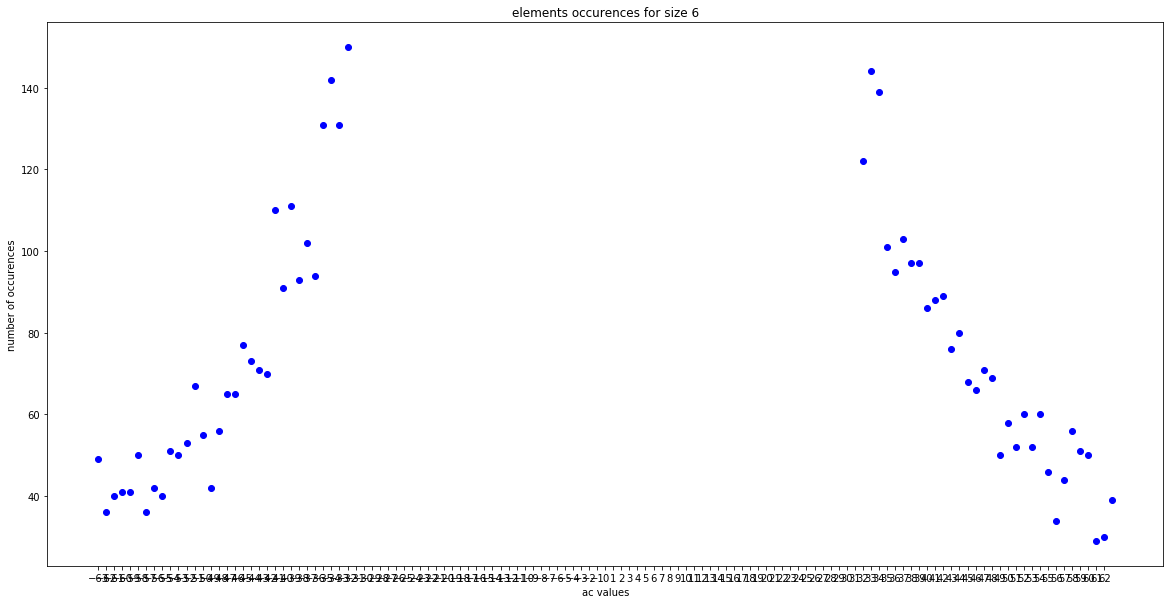

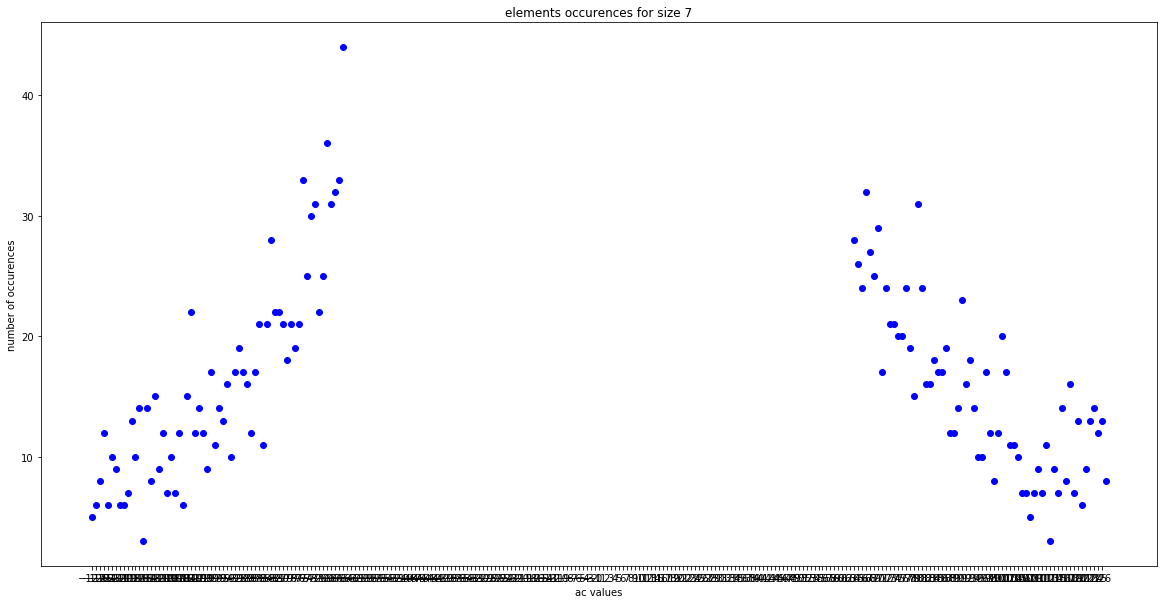

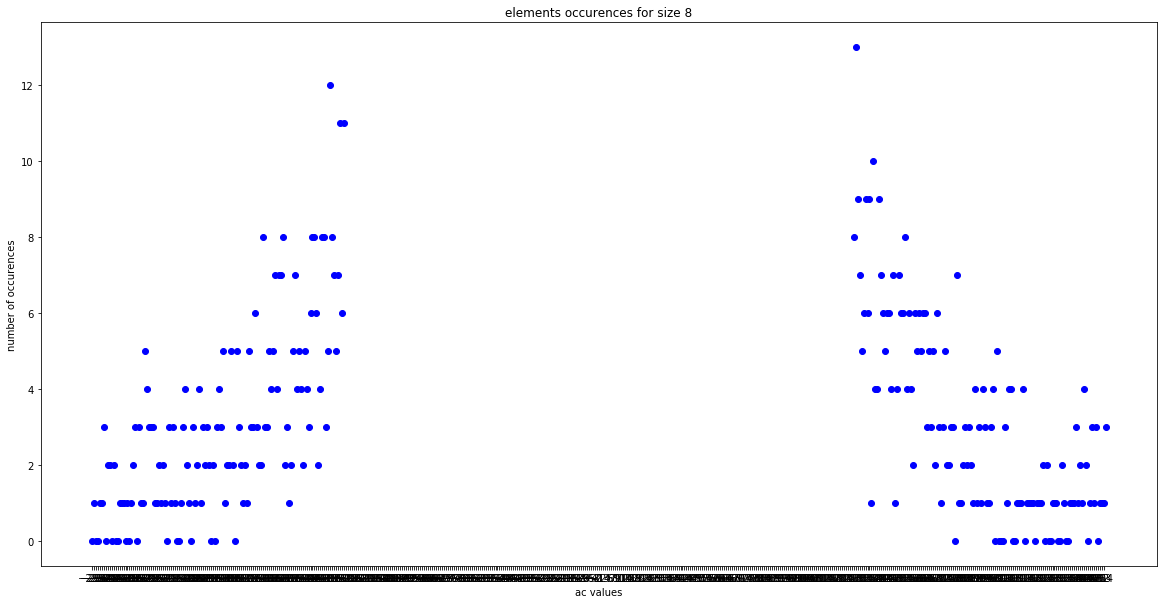

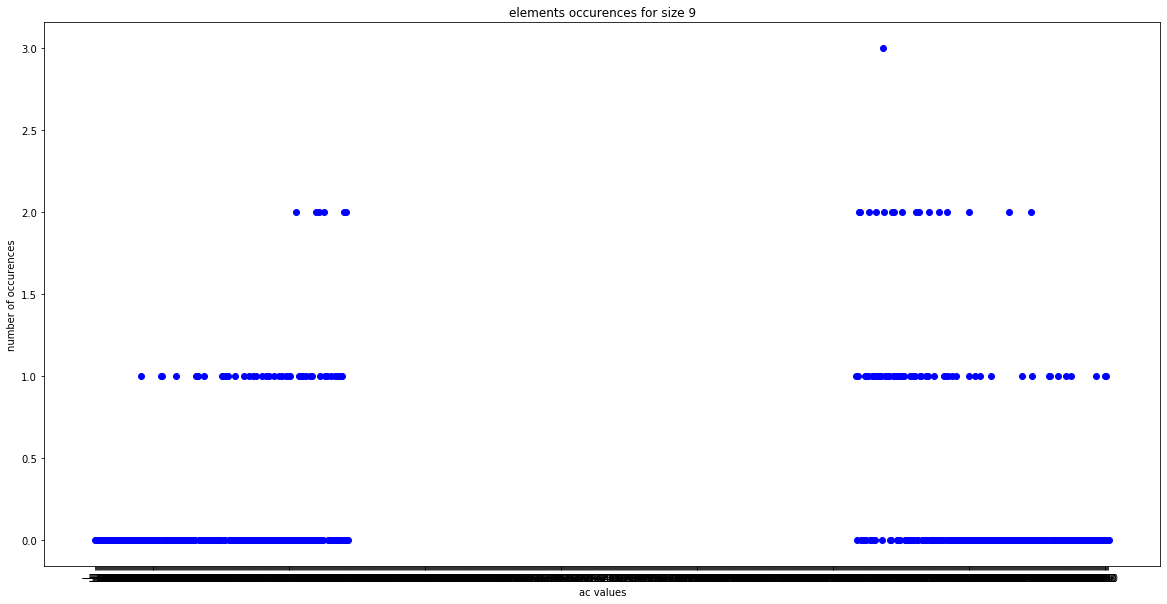

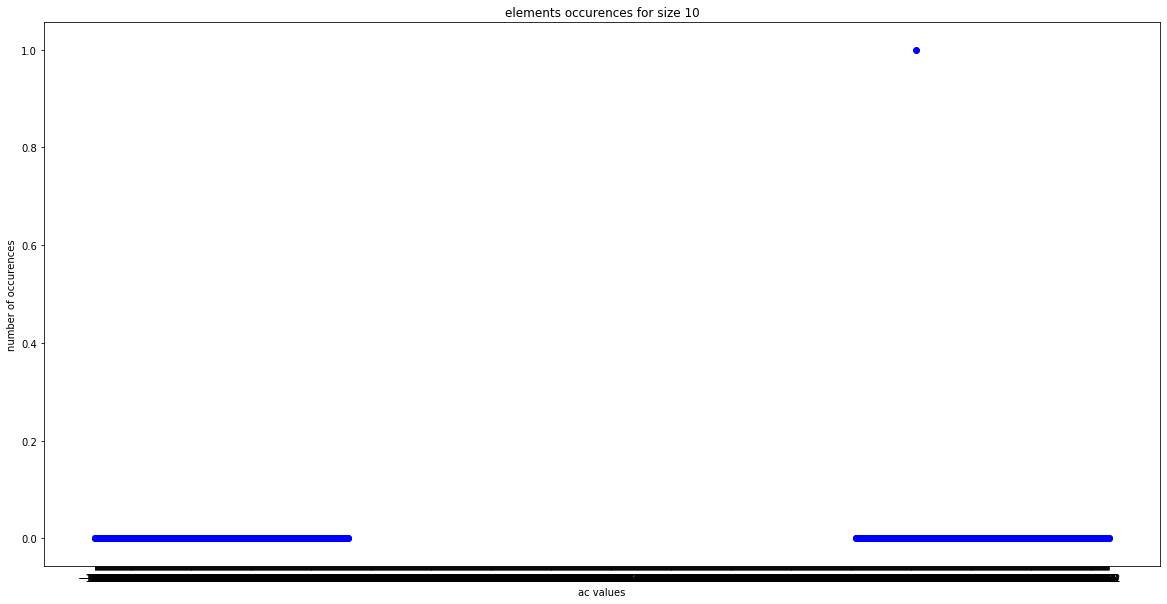

In [100]:
for size in range(1,11):
    plt.figure(figsize = (20,10))
#     plt.minorticks_on()
#     plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')
#     plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
    plt.scatter(ac_values_dic[size], ac_counts_dic[size], color = 'blue')
    plt.xticks(range(ac_values_dic[size][0],ac_values_dic[size][-1]))
    plt.xlabel('ac values')
    plt.ylabel('number of occurences')
    plt.title('elements occurences for size '+str(size))
    plt.savefig('elements occurences for size '+str(size)+'.pdf')
    plt.savefig('elements occurences for size '+str(size)+'.png')

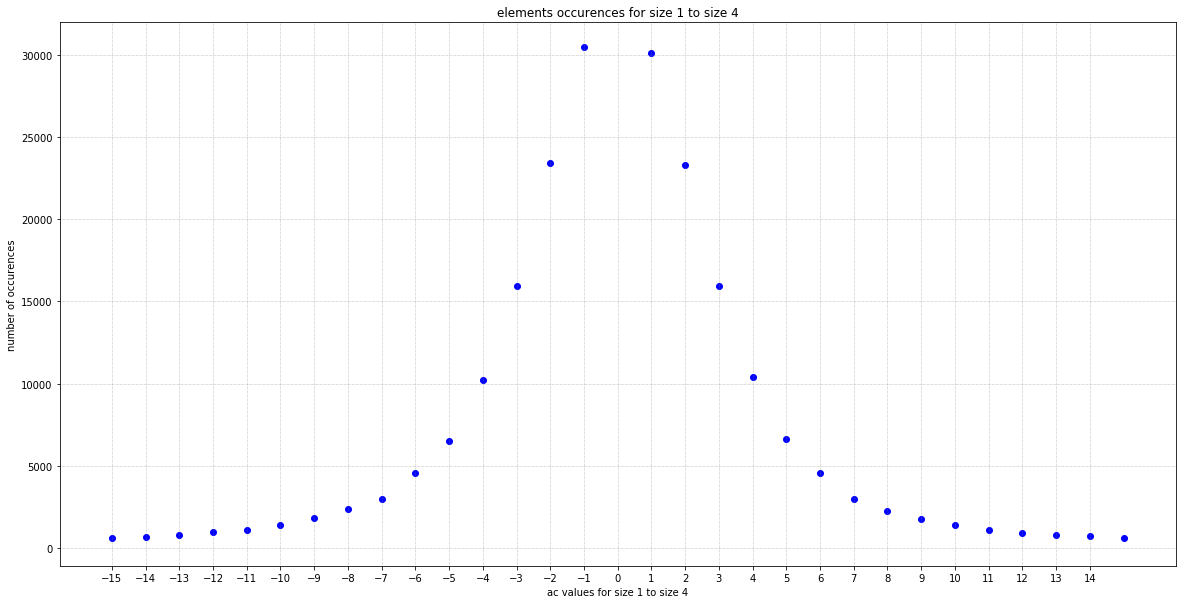

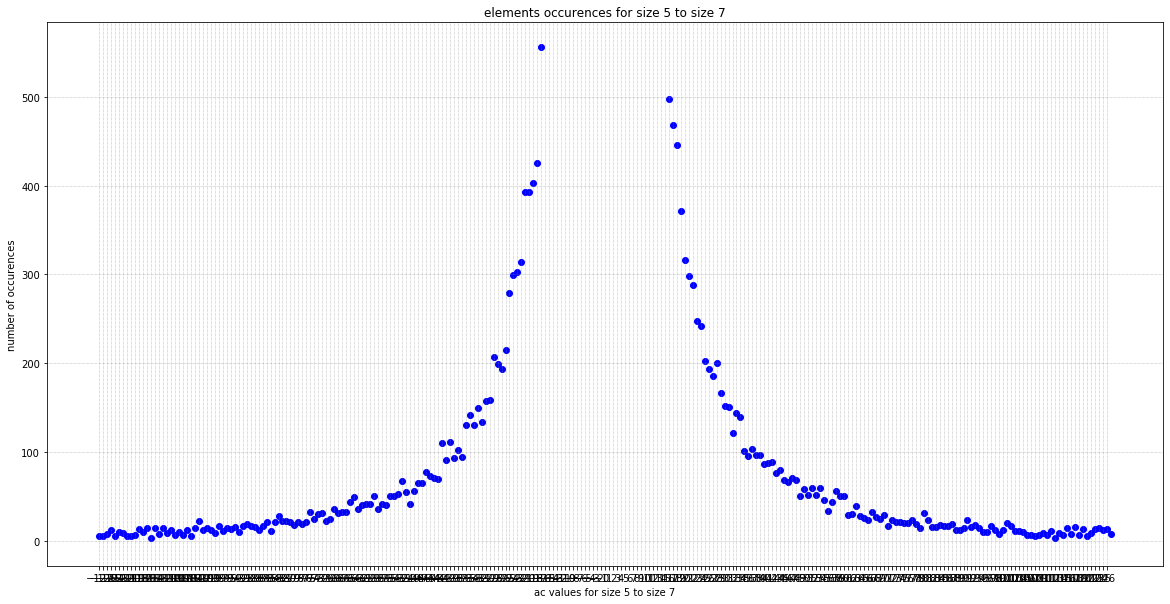

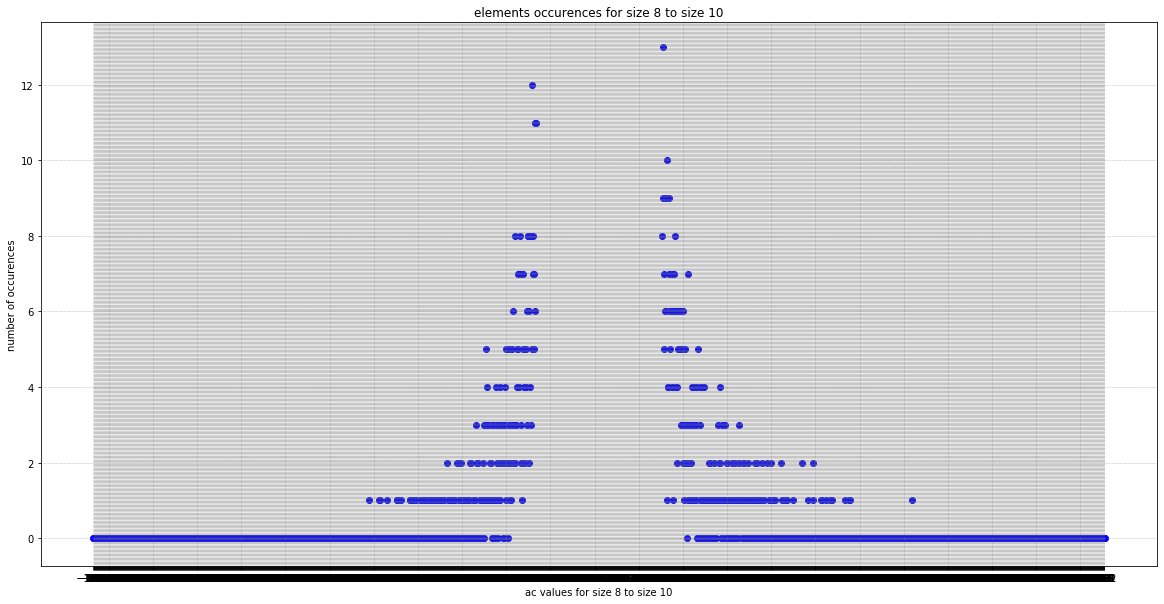

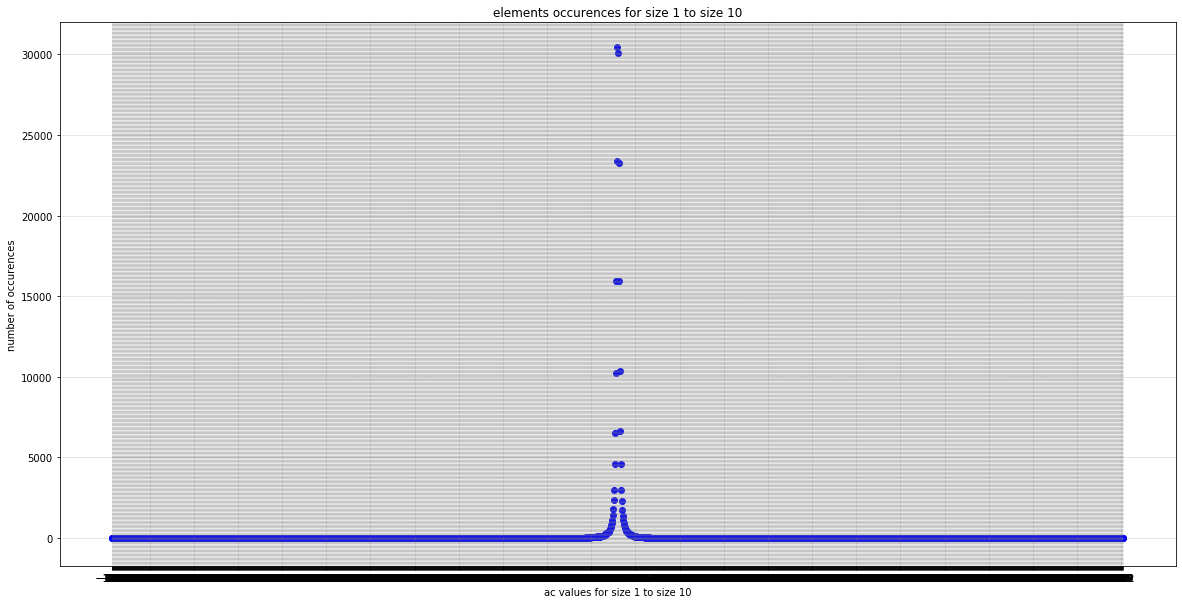

In [101]:
plt.figure(figsize = (20,10))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')
for size in range(1,5):
    plt.scatter(ac_values_dic[size], ac_counts_dic[size], color = 'blue')
plt.xticks(range(ac_values_dic[size][0],ac_values_dic[size][-1]))
plt.xlabel('ac values for size 1 to size 4')
plt.ylabel('number of occurences')
plt.title('elements occurences for size 1 to size 4')
plt.savefig('elements occurences for size 1 to size 4.pdf')
plt.savefig('elements occurences for size 1 to size 4.png')

plt.figure(figsize = (20,10))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')
for size in range(5,8):
    plt.scatter(ac_values_dic[size], ac_counts_dic[size], color = 'blue')
plt.xticks(range(ac_values_dic[size][0],ac_values_dic[size][-1]))
plt.xlabel('ac values for size 5 to size 7')
plt.ylabel('number of occurences')
plt.title('elements occurences for size 5 to size 7')
plt.savefig('elements occurences for size 5 to size 7.pdf')
plt.savefig('elements occurences for size 5 to size 7.png')

plt.figure(figsize = (20,10))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')
for size in range(8,11):
    plt.scatter(ac_values_dic[size], ac_counts_dic[size], color = 'blue')
plt.xticks(range(ac_values_dic[size][0],ac_values_dic[size][-1]))
plt.xlabel('ac values for size 8 to size 10')
plt.ylabel('number of occurences')
plt.title('elements occurences for size 8 to size 10')
plt.savefig('elements occurences for size 8 to size 10.pdf')
plt.savefig('elements occurences for size 8 to size 10.png')          
          
plt.figure(figsize = (20,10))
plt.grid(which='major', linestyle=':', linewidth='0.5', color='gray')
for size in range(1,11):
    plt.scatter(ac_values_dic[size], ac_counts_dic[size], color = 'blue')
plt.xticks(range(ac_values_dic[size][0],ac_values_dic[size][-1]))
plt.xlabel('ac values for size 1 to size 10')
plt.ylabel('number of occurences')
plt.title('elements occurences for size 1 to size 10')
plt.savefig('elements occurences for size 1 to size 10.pdf')
plt.savefig('elements occurences for size 1 to size 10.png')  